#### MNIST 손글씨 예측 함수
- Muticlass
- pytorch
- 

In [18]:
# 모듈 로딩
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics.classification import F1Score, Accuracy
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from get_model import *
from get_dataset import *
from get_train_model import *
from func import *

import pandas as pd
import numpy as np

[1] 데이터 전처리

In [19]:
train=pd.read_csv(r'C:\Users\KDP-25\Desktop\KDT_06\Vision\MNIST_train_csv',header=None)
test=pd.read_csv(r'C:\Users\KDP-25\Desktop\KDT_06\Vision\MNIST_test_csv', header=None)

In [20]:
train.info(), train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


(None,
    0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
 0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
 
    779  780  781  782  783  784  
 0    0    0    0    0    0    5  
 1    0    0    0    0    0    0  
 2    0    0    0    0    0    4  
 
 [3 rows x 785 columns])

In [21]:
train[784]

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: 784, Length: 60000, dtype: int64

In [22]:
trainDF=Torch_proccesing(train)
testDF=Torch_proccesing(test)

In [23]:
trainDF.feature=train[train.columns[:784]]
trainDF.target=train[784]
testDF.feature=test[test.columns[:784]]
testDF.target=test[784]

In [24]:
trainDF.feature.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       774, 775, 776, 777, 778, 779, 780, 781, 782, 783],
      dtype='int64', length=784)

In [25]:
mmscaler=MinMaxScaler()

mmscaler.fit(trainDF.feature)
X_train_scaled=mmscaler.transform(trainDF.feature)
X_test_scaled=mmscaler.transform(testDF.feature)

In [26]:
hidden=[200,120,100,80,50]
mnModel=Custom_model(in_in=784, out_out=10, af=F.relu, model_type='multiclass',
             hidden=hidden)

In [27]:
mnModel.parameters

<bound method Module.parameters of Custom_model(
  (in_layer): Linear(in_features=784, out_features=200, bias=True)
  (h_layers): ModuleList(
    (0): Linear(in_features=200, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=80, bias=True)
    (3): Linear(in_features=80, out_features=50, bias=True)
  )
  (out_layer): Linear(in_features=50, out_features=10, bias=True)
)>

In [28]:
BATCH_SIZE=32
LR=0.001
EPOCH=100
SAVE_PATH='../data/model'
SAVE_FILE='model_all.pth'


In [29]:
optimizer=optim.Adam(mnModel.parameters(), lr=LR)

In [30]:
trainDS=Custom_Dataset(pd.DataFrame(X_train_scaled), trainDF.target.to_frame())
testDS= Custom_Dataset(pd.DataFrame(X_test_scaled), testDF.target.to_frame())

trainDL=DataLoader(trainDS, batch_size=BATCH_SIZE)
testDL= DataLoader(testDS, batch_size=BATCH_SIZE)

In [31]:
for f, t in trainDL:
    print(f,t)
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([[5.],
        [0.],
        [4.],
        [1.],
        [9.],
        [2.],
        [1.],
        [3.],
        [1.],
        [4.],
        [3.],
        [5.],
        [3.],
        [6.],
        [1.],
        [7.],
        [2.],
        [8.],
        [6.],
        [9.],
        [4.],
        [0.],
        [9.],
        [1.],
        [1.],
        [2.],
        [4.],
        [3.],
        [2.],
        [7.],
        [3.],
        [8.]])


In [32]:
mnModel.parameters

<bound method Module.parameters of Custom_model(
  (in_layer): Linear(in_features=784, out_features=200, bias=True)
  (h_layers): ModuleList(
    (0): Linear(in_features=200, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=80, bias=True)
    (3): Linear(in_features=80, out_features=50, bias=True)
  )
  (out_layer): Linear(in_features=50, out_features=10, bias=True)
)>

In [33]:
LOSS, SCORE=model_training(mnModel, trainDL, testDL,
               optimizer, LIMIT=10, break_param='score',
               type='muticlass', optim_type='score', numcls=10,
               epoch=EPOCH, SAVE_PATH=SAVE_PATH, SAVE_FILE=SAVE_FILE,
               save_type='all')

1/100
Train
 Loss: 0.35833020125031473
 Score: 0.8897833333333334
Val
 Loss: 0.22181936781020306
 Score: 0.931908945686901
2/100
Train
 Loss: 0.13438124783908328
 Score: 0.9607166666666667
Val
 Loss: 0.12921382458088324
 Score: 0.9606629392971247
3/100
Train
 Loss: 0.0954519670955992
 Score: 0.9721333333333333
Val
 Loss: 0.15110275705209963
 Score: 0.9588658146964856
4/100
Train
 Loss: 0.07242202671849324
 Score: 0.9787833333333333
Val
 Loss: 0.12264114568888806
 Score: 0.9683506389776357
5/100
Train
 Loss: 0.057690023623222564
 Score: 0.9832833333333333
Val
 Loss: 0.13180556719841513
 Score: 0.9659544728434505
6/100
Train
 Loss: 0.0490952620531801
 Score: 0.9852166666666666
Val
 Loss: 0.1204963948958712
 Score: 0.9677515974440895
7/100
Train
 Loss: 0.04024108169274841
 Score: 0.9884
Val
 Loss: 0.13543139098391302
 Score: 0.9684504792332268
8/100
Train
 Loss: 0.03659130744033355
 Score: 0.9890666666666666
Val
 Loss: 0.14235621668080023
 Score: 0.9690495207667732
9/100
Train
 Loss: 0.03

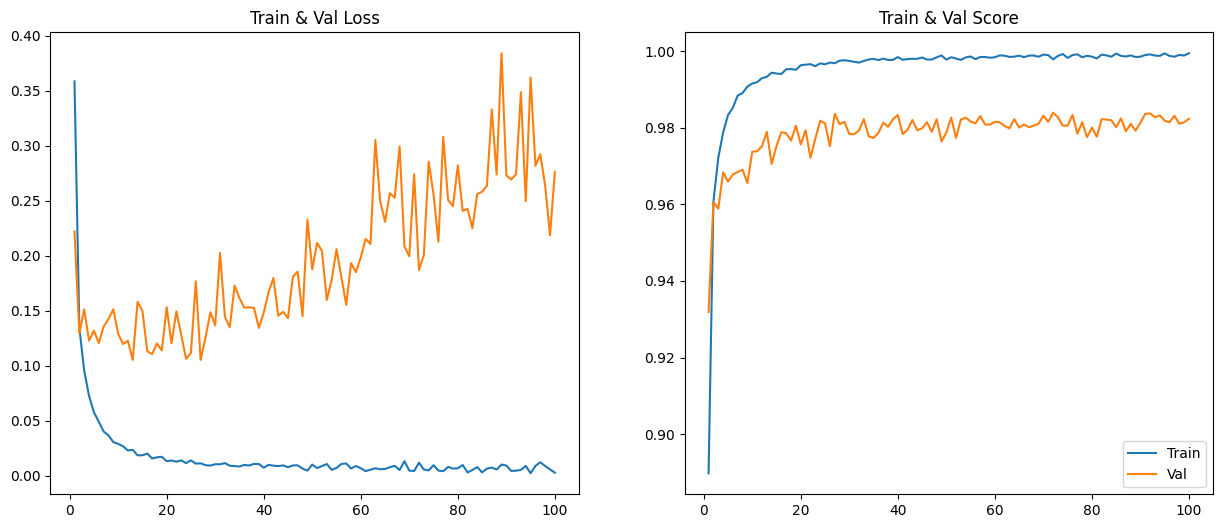

In [34]:
draw_result(EPOCH=100, LOSS_HISTORY=LOSS, SCORE_HISTORY=SCORE)